In [ ]:
#author: Anusha Prakash
#Project: Aslyum Cases prediction



# EDA ON PRE-PROCESSED DATA

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *

In [3]:
data = pd.read_csv("processed_asylum_seekers.csv")
data.head()

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N)
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y


In [4]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 6.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=1a97f2ed685047ea2700c650a7c39c2ae11ee01ce8cf20c504f11a6b5aad9abf
  Stored in directory: /Users/anushaprakash/Library/Caches/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [9]:
import pycountry

In [17]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df = data.copy()
df['CODE']=alpha3code(df.country_of_origin)
df.head()

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,AFG
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,AFG
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,AFG
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,AFG
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,AFG


In [19]:
df['CODE'].unique()

array(['AFG', 'AGO', 'ALB', 'AND', 'None', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DMA', 'DNK', 'DZA',
       'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'GAB', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ',
       'GRC', 'GRD', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KWT', 'LBN', 'LBR',
       'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDG',
       'MDV', 'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS',
       'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'PNG', 'POL',
       'PRT', 'PRY'

In [16]:
df['country_of_origin']= df['country_of_origin'].replace('USA','United States')
df

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,None
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,None
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,None
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,None
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,USA,Zimbabwe,229.0,16.0,0.0,10.0,232.0,435.0,G,IN,N,None
129716,2016,USA,Zimbabwe,12.0,0.0,0.0,23.0,142.0,138.0,G,EO,N,None
129717,2016,South Africa,Zimbabwe,0.0,0.0,0.0,94.0,103.0,0.0,G,AR,N,None
129718,2016,South Africa,Zimbabwe,7964.0,73.0,7869.0,0.0,45362.0,41260.0,G,FI,Y,None


In [20]:
!pip install geopandas

     |████████████████████████████████| 1.1 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.4 MB 3.0 MB/s eta 0:00:011


In [22]:
import geopandas

In [23]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
#merge=merge.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()


In [24]:
location

,name,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672
...,...,...,...
153,Vietnam,14.058324,108.277199
154,W. Sahara,24.215527,-12.885834
155,Yemen,15.552727,48.516388
156,Zambia,-13.133897,27.849332


In [27]:
len(df)

129720

In [25]:
merge=merge.merge(location,on='name').reset_index()

In [26]:
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,year,country_of_residence,country_of_origin,...,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),latitude,longitude
0,0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2000,USA,Fiji,...,65.0,39.0,98.0,447.0,416.0,G,EO,Y,-16.578193,179.414413
1,1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2000,USA,Fiji,...,47.0,64.0,129.0,661.0,675.0,G,IN,Y,-16.578193,179.414413
2,2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2000,Germany,Fiji,...,0.0,1.0,0.0,0.0,0.0,G,NaN,Y,-16.578193,179.414413
3,3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2000,Canada,Fiji,...,10.0,14.0,11.0,23.0,239.0,G,FI,Y,-16.578193,179.414413
4,4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2000,Australia,Fiji,...,0.0,99.0,17.0,46.0,255.0,G,AR,Y,-16.578193,179.414413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106001,106001,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2016,Turkey,South Sudan,...,0.0,0.0,0.0,0.0,0.0,U,FI,N,12.862807,30.217636
106002,106002,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2016,Uganda,South Sudan,...,20.0,0.0,15.0,1838.0,1896.0,G,FA,N,12.862807,30.217636
106003,106003,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2016,Ukraine,South Sudan,...,0.0,0.0,0.0,0.0,0.0,G,FI,N,12.862807,30.217636
106004,106004,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2016,USA,South Sudan,...,0.0,0.0,0.0,0.0,0.0,G,EO,N,12.862807,30.217636


In [28]:
df.columns

Index(['year', 'country_of_residence', 'country_of_origin',
       'total_applied_during_year', 'decisions_recognized', 'total_rejected',
       'decisions_closed', 'total_pending_year_start',
       'total_pending_year_end', 'application_authority',
       'stage_of_application', 'Rejected(Y/N)', 'CODE'],
      dtype='object')

In [31]:
!pip install mapclassify

In [37]:
df[(df.year==2000)& (df.country_of_origin=='Fiji')]

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
1633,2000,USA,Fiji,171.0,65.0,39.0,98.0,447.0,416.0,G,EO,Y,FJI
1634,2000,USA,Fiji,236.0,47.0,64.0,129.0,661.0,675.0,G,IN,Y,FJI
1635,2000,Germany,Fiji,1.0,0.0,1.0,0.0,0.0,0.0,G,NaN,Y,FJI
1636,2000,Canada,Fiji,252.0,10.0,14.0,11.0,23.0,239.0,G,FI,Y,FJI
1637,2000,Australia,Fiji,325.0,0.0,99.0,17.0,46.0,255.0,G,AR,Y,FJI
1638,2000,Australia,Fiji,658.0,0.0,576.0,37.0,36.0,76.0,G,FI,Y,FJI


In [103]:
# plot confirmed cases world map 

def plot_applications(year,color):
    merge_x = merge[merge.year==year]
    merge_x = merge_x.drop_duplicates(subset=['country_of_origin']).reset_index(drop=True)
    merge_x.plot(column='total_applied_during_year', scheme="quantiles",
               figsize=(50, 50),
               legend=True,cmap=color)
    countries = str(merge_x['country_of_origin'].nunique())
    plt.title('Applications from Different Countries in the year '+str(year)+", Total Participating countries: "+countries,fontsize=35)
    # add countries names and numbers 
    for i in range(0,len(merge_x)):
        plt.text(float(merge_x.longitude[i]),float(merge_x.latitude[i]),"{}".format(merge_x.total_applied_during_year[i]),size=15)
    plt.savefig("Applications"+str(year)+".png")
    plt.show()

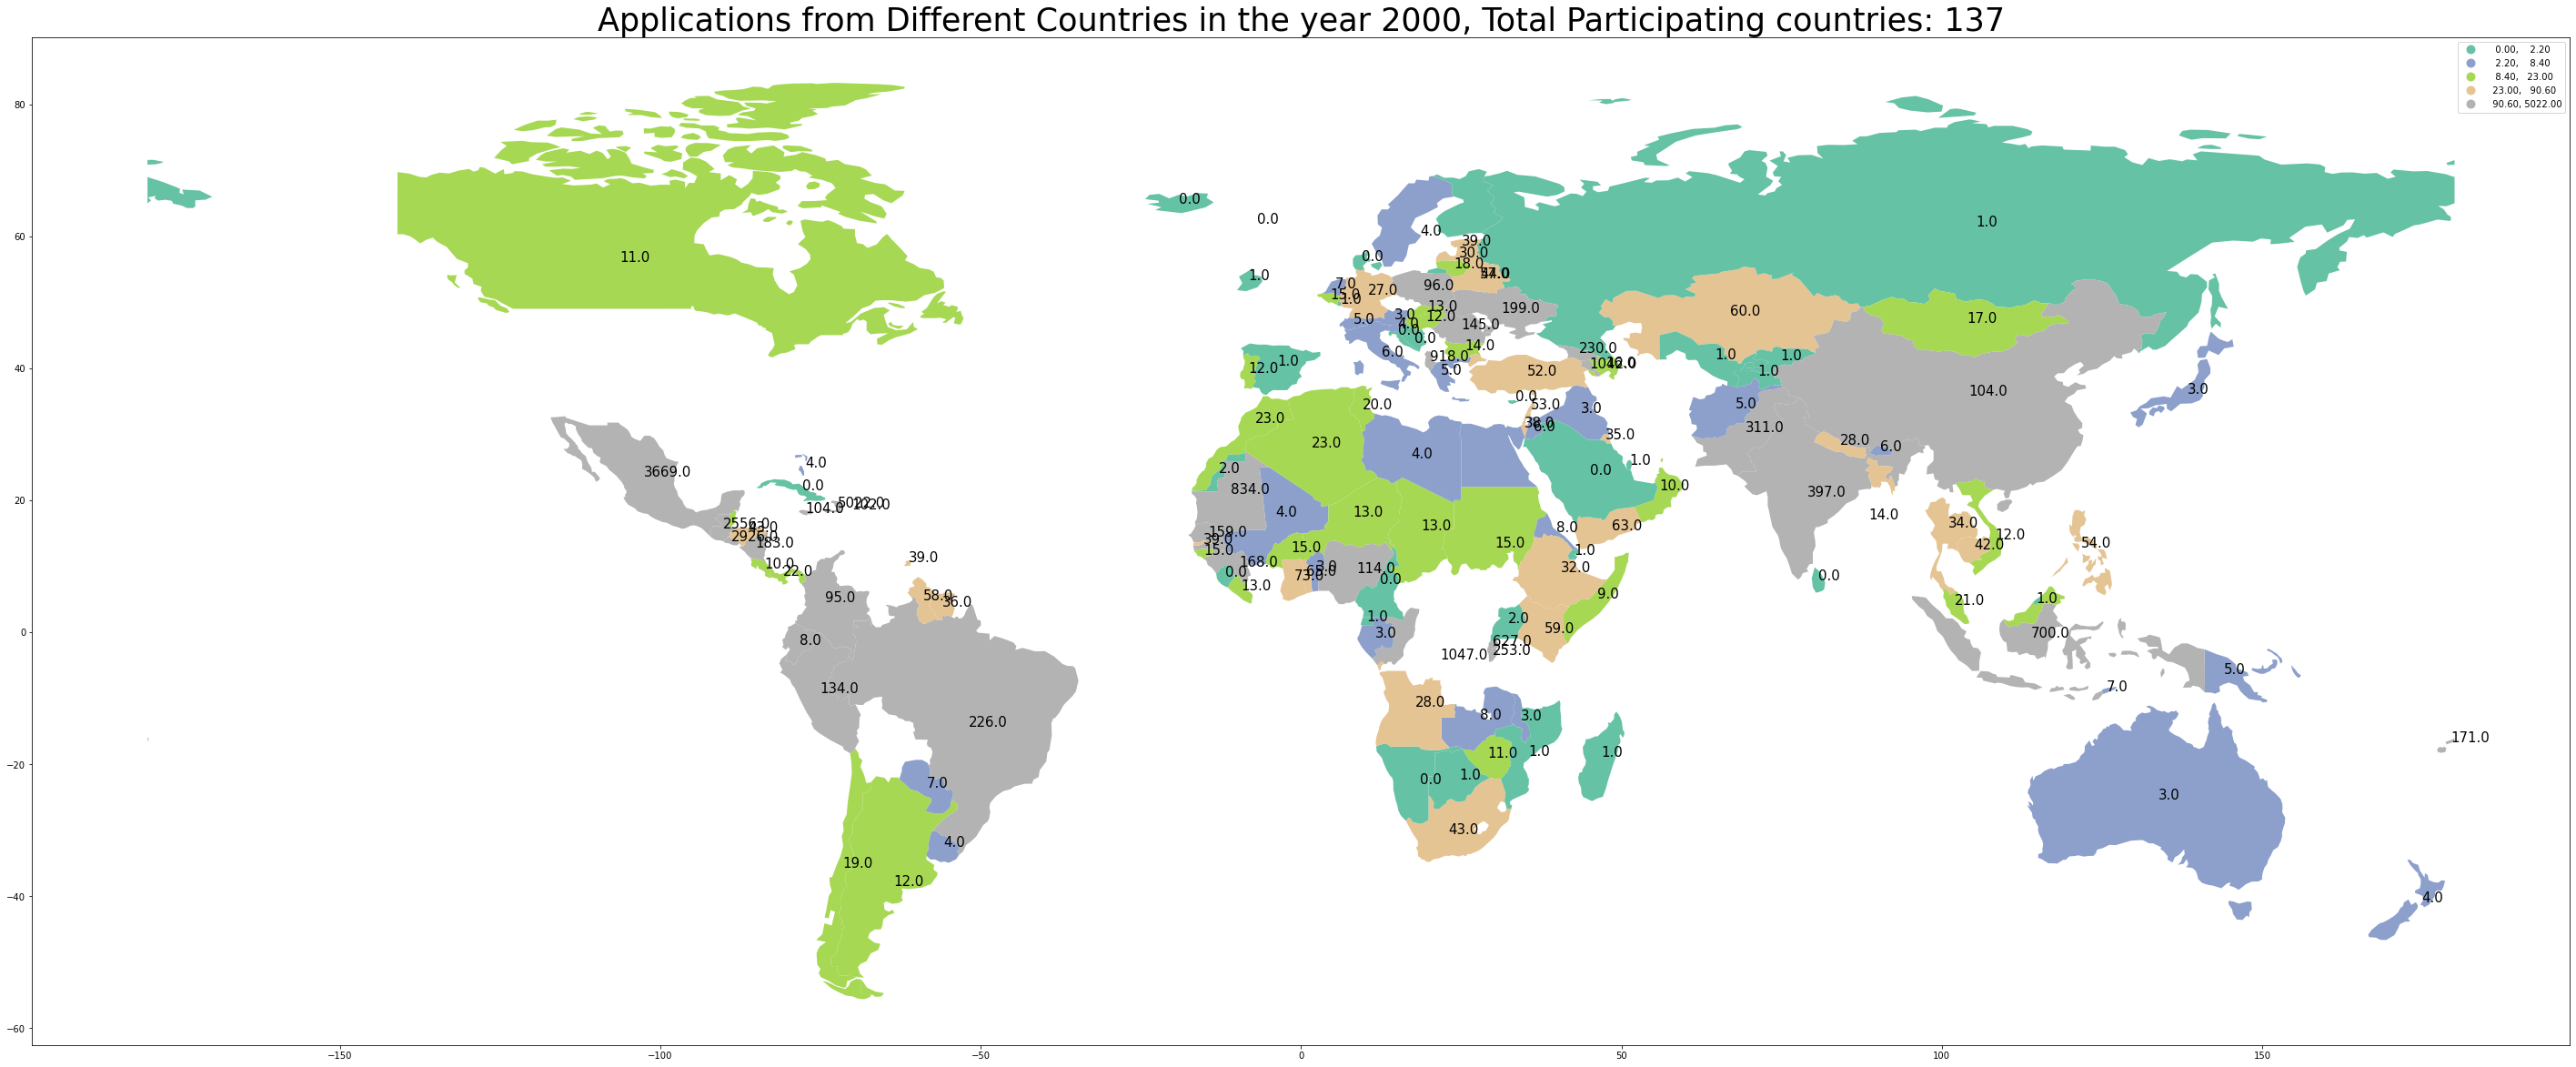

In [104]:
plot_applications(2000,color='Set2')

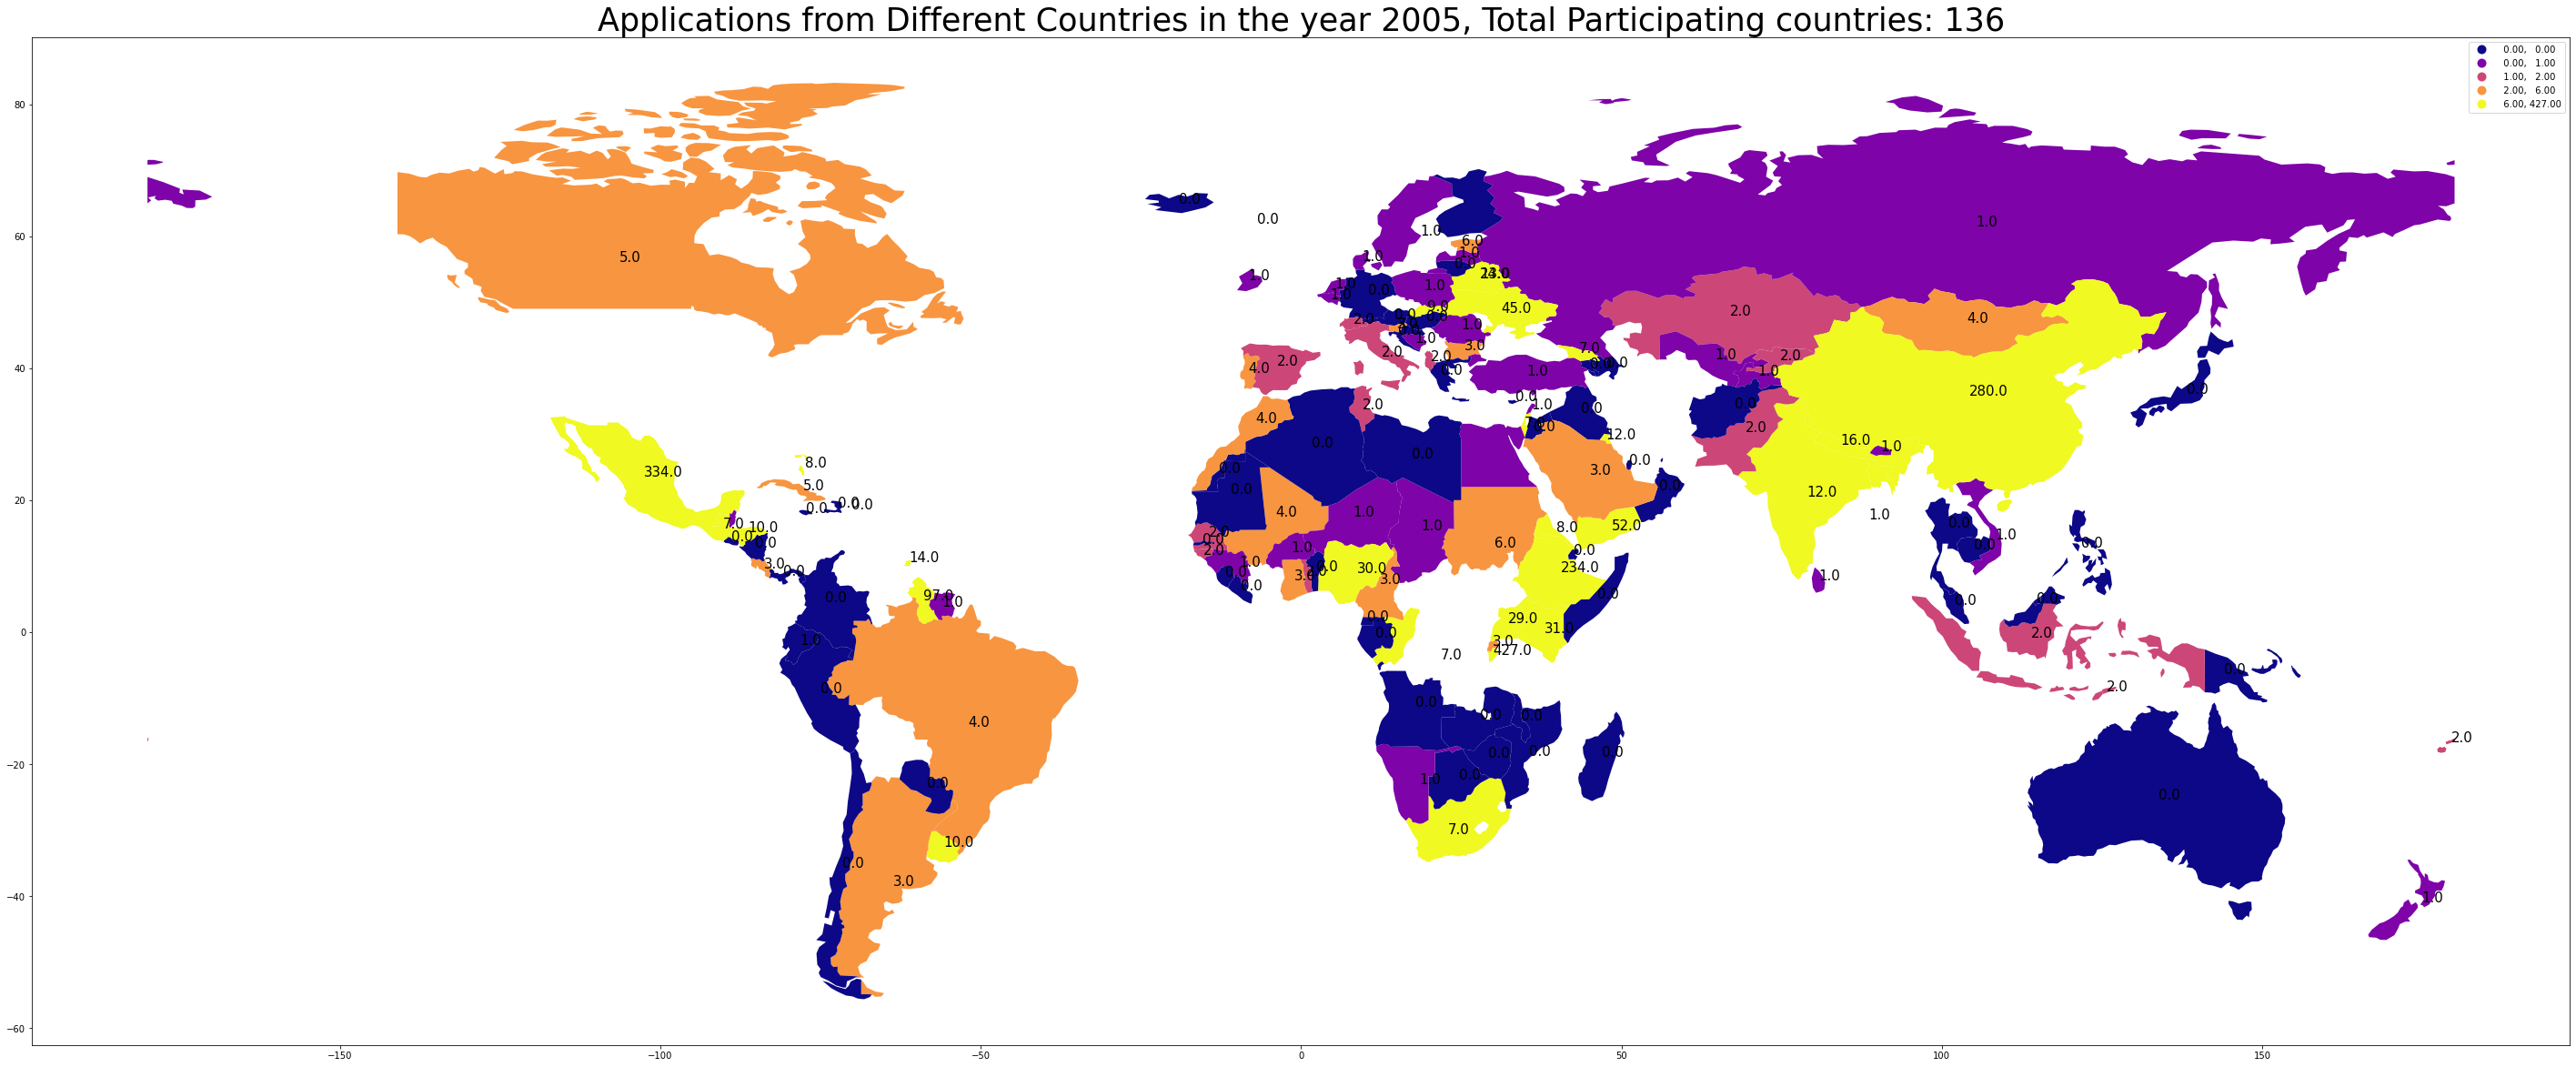

In [105]:
#plotting for the year 2005
plot_applications(2005,color='plasma')

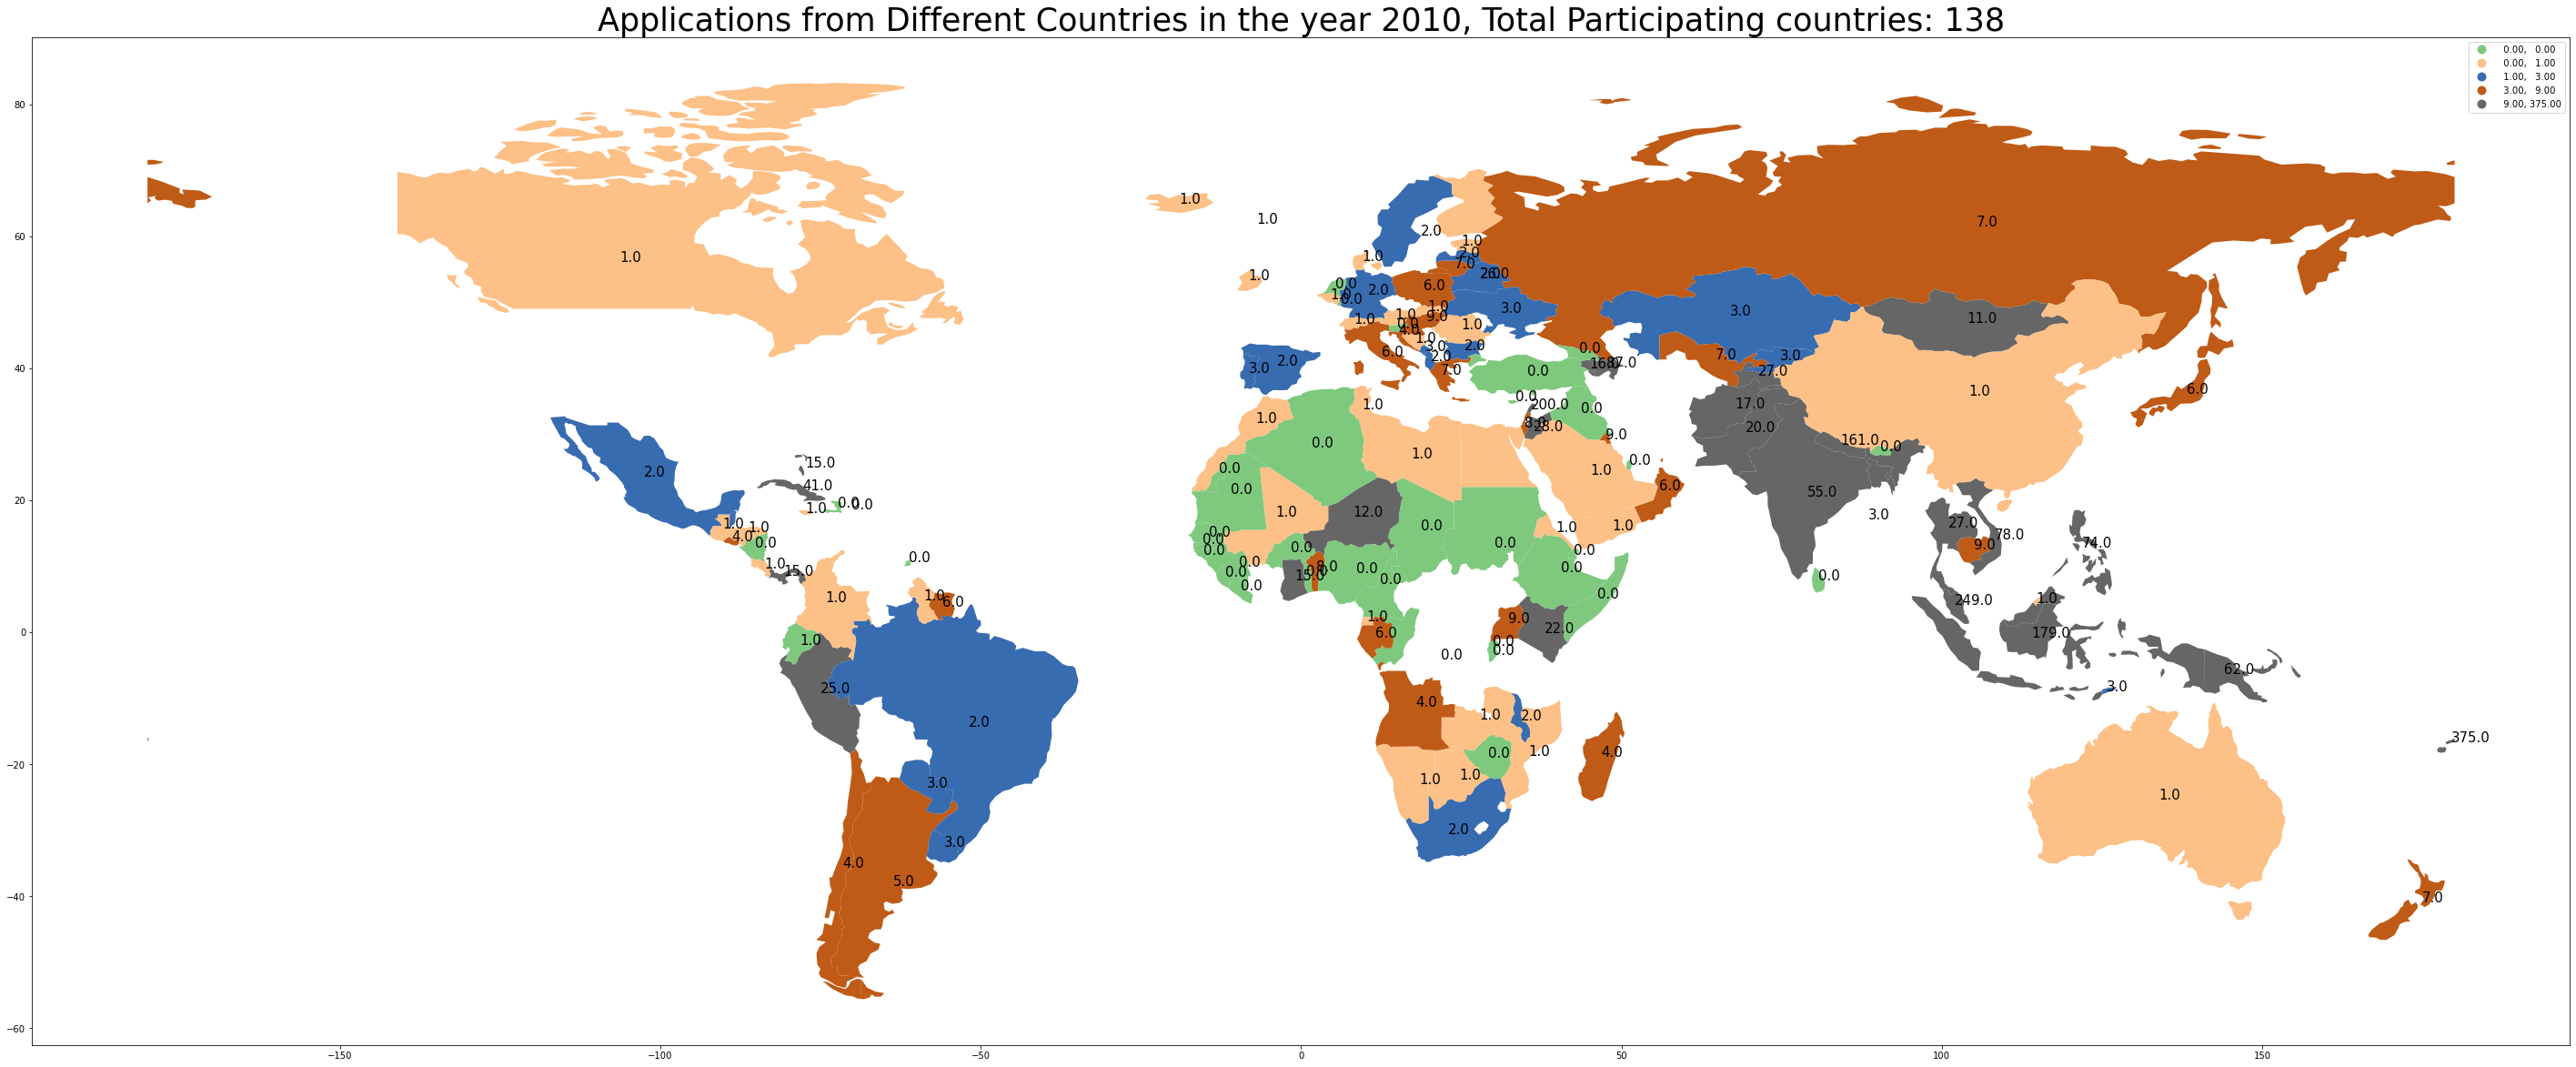

In [106]:
#plotting for the year 2010
plot_applications(2010,color='Accent')

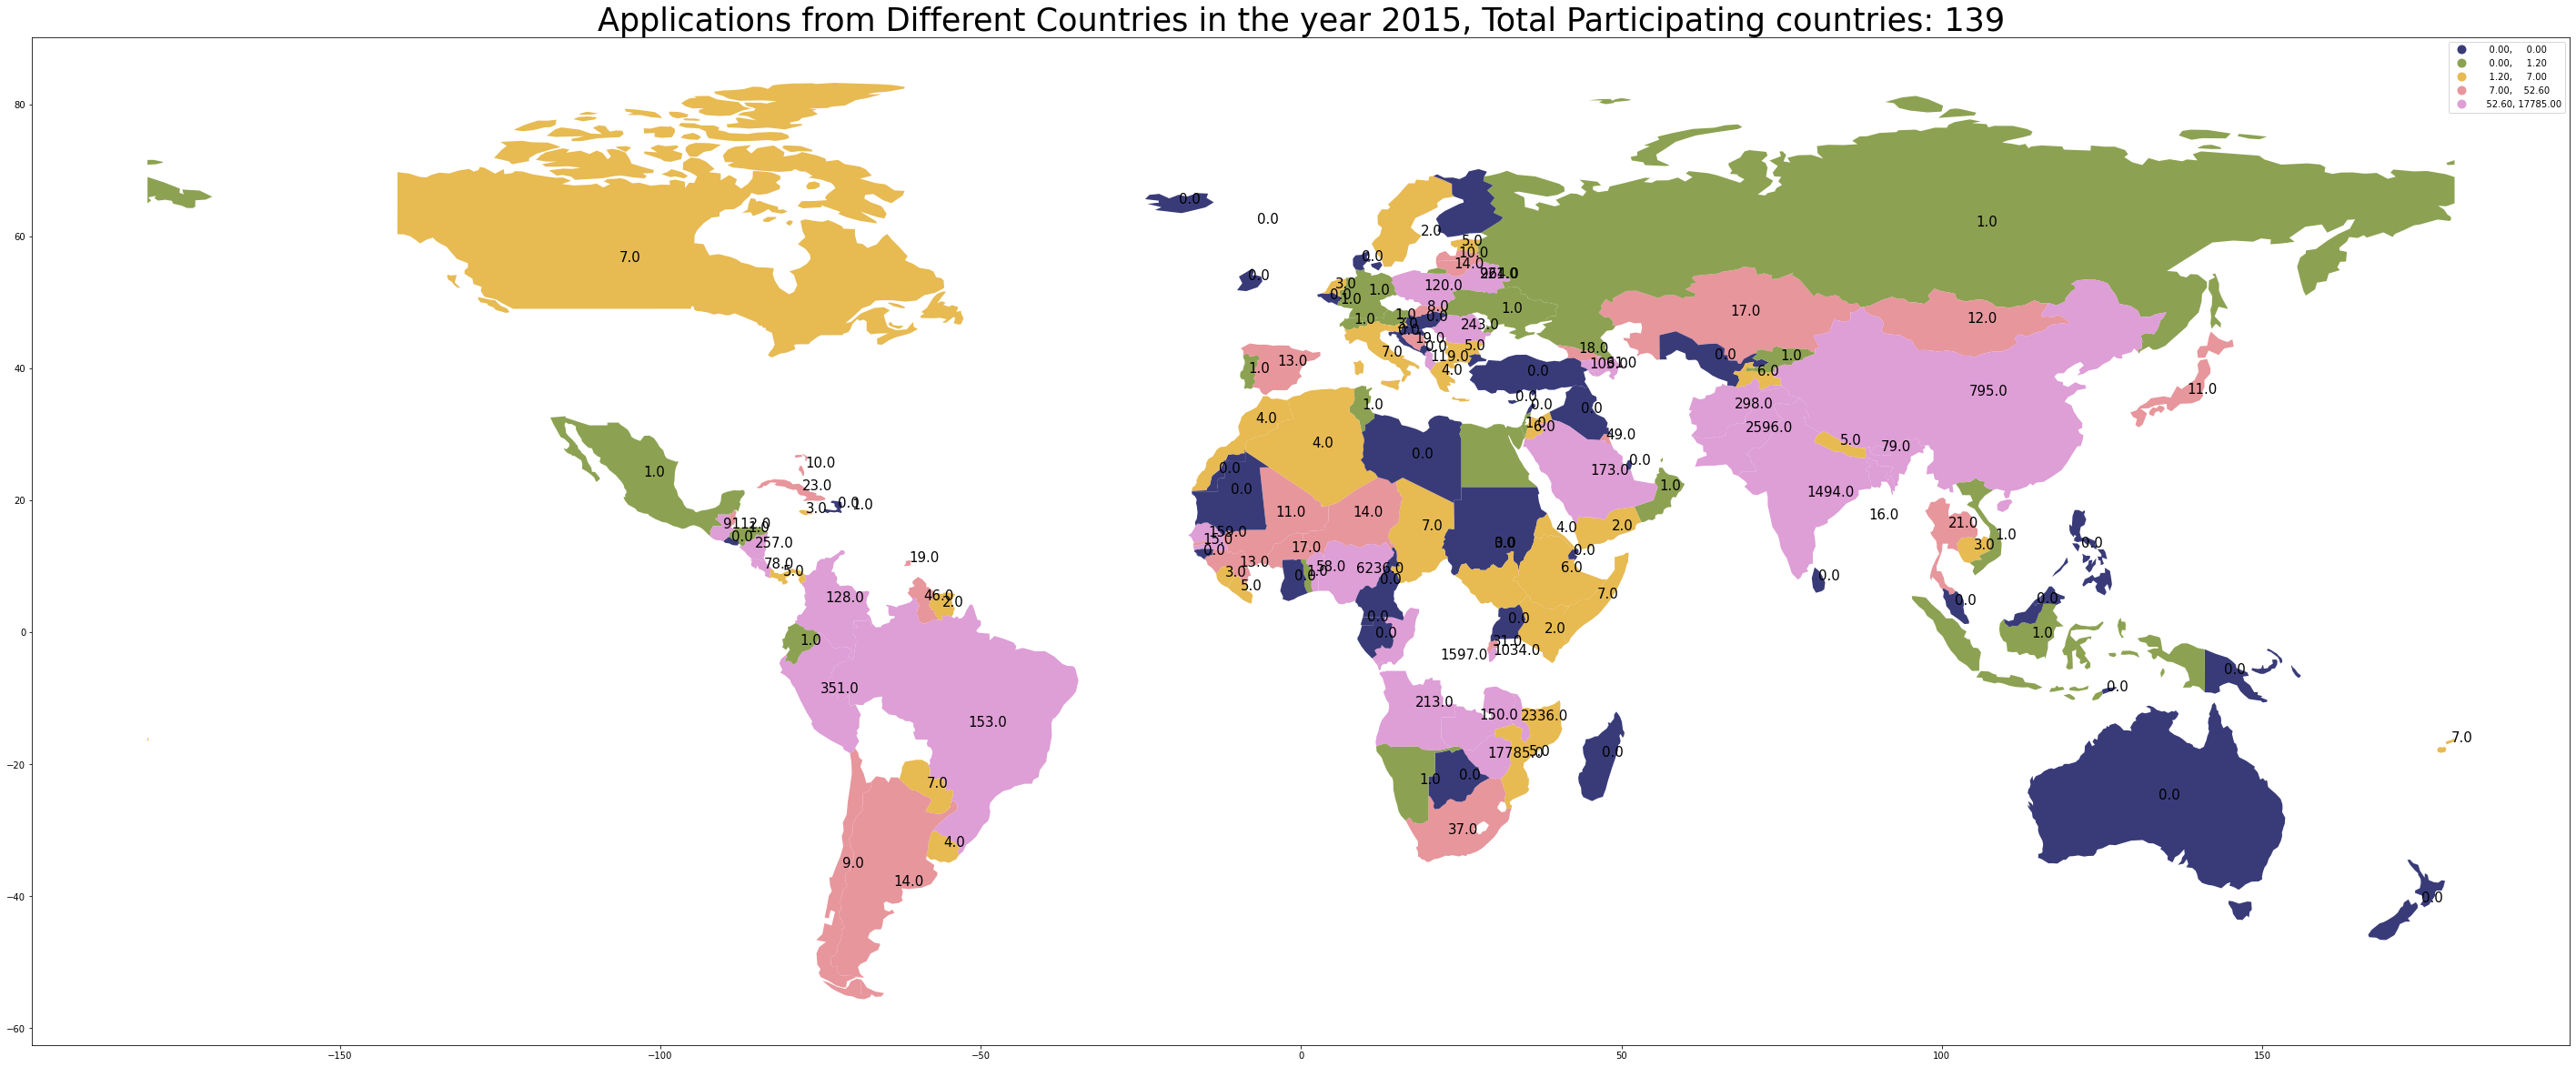

In [107]:
#plotting for the year 2015
plot_applications(2015,color='tab20b')

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


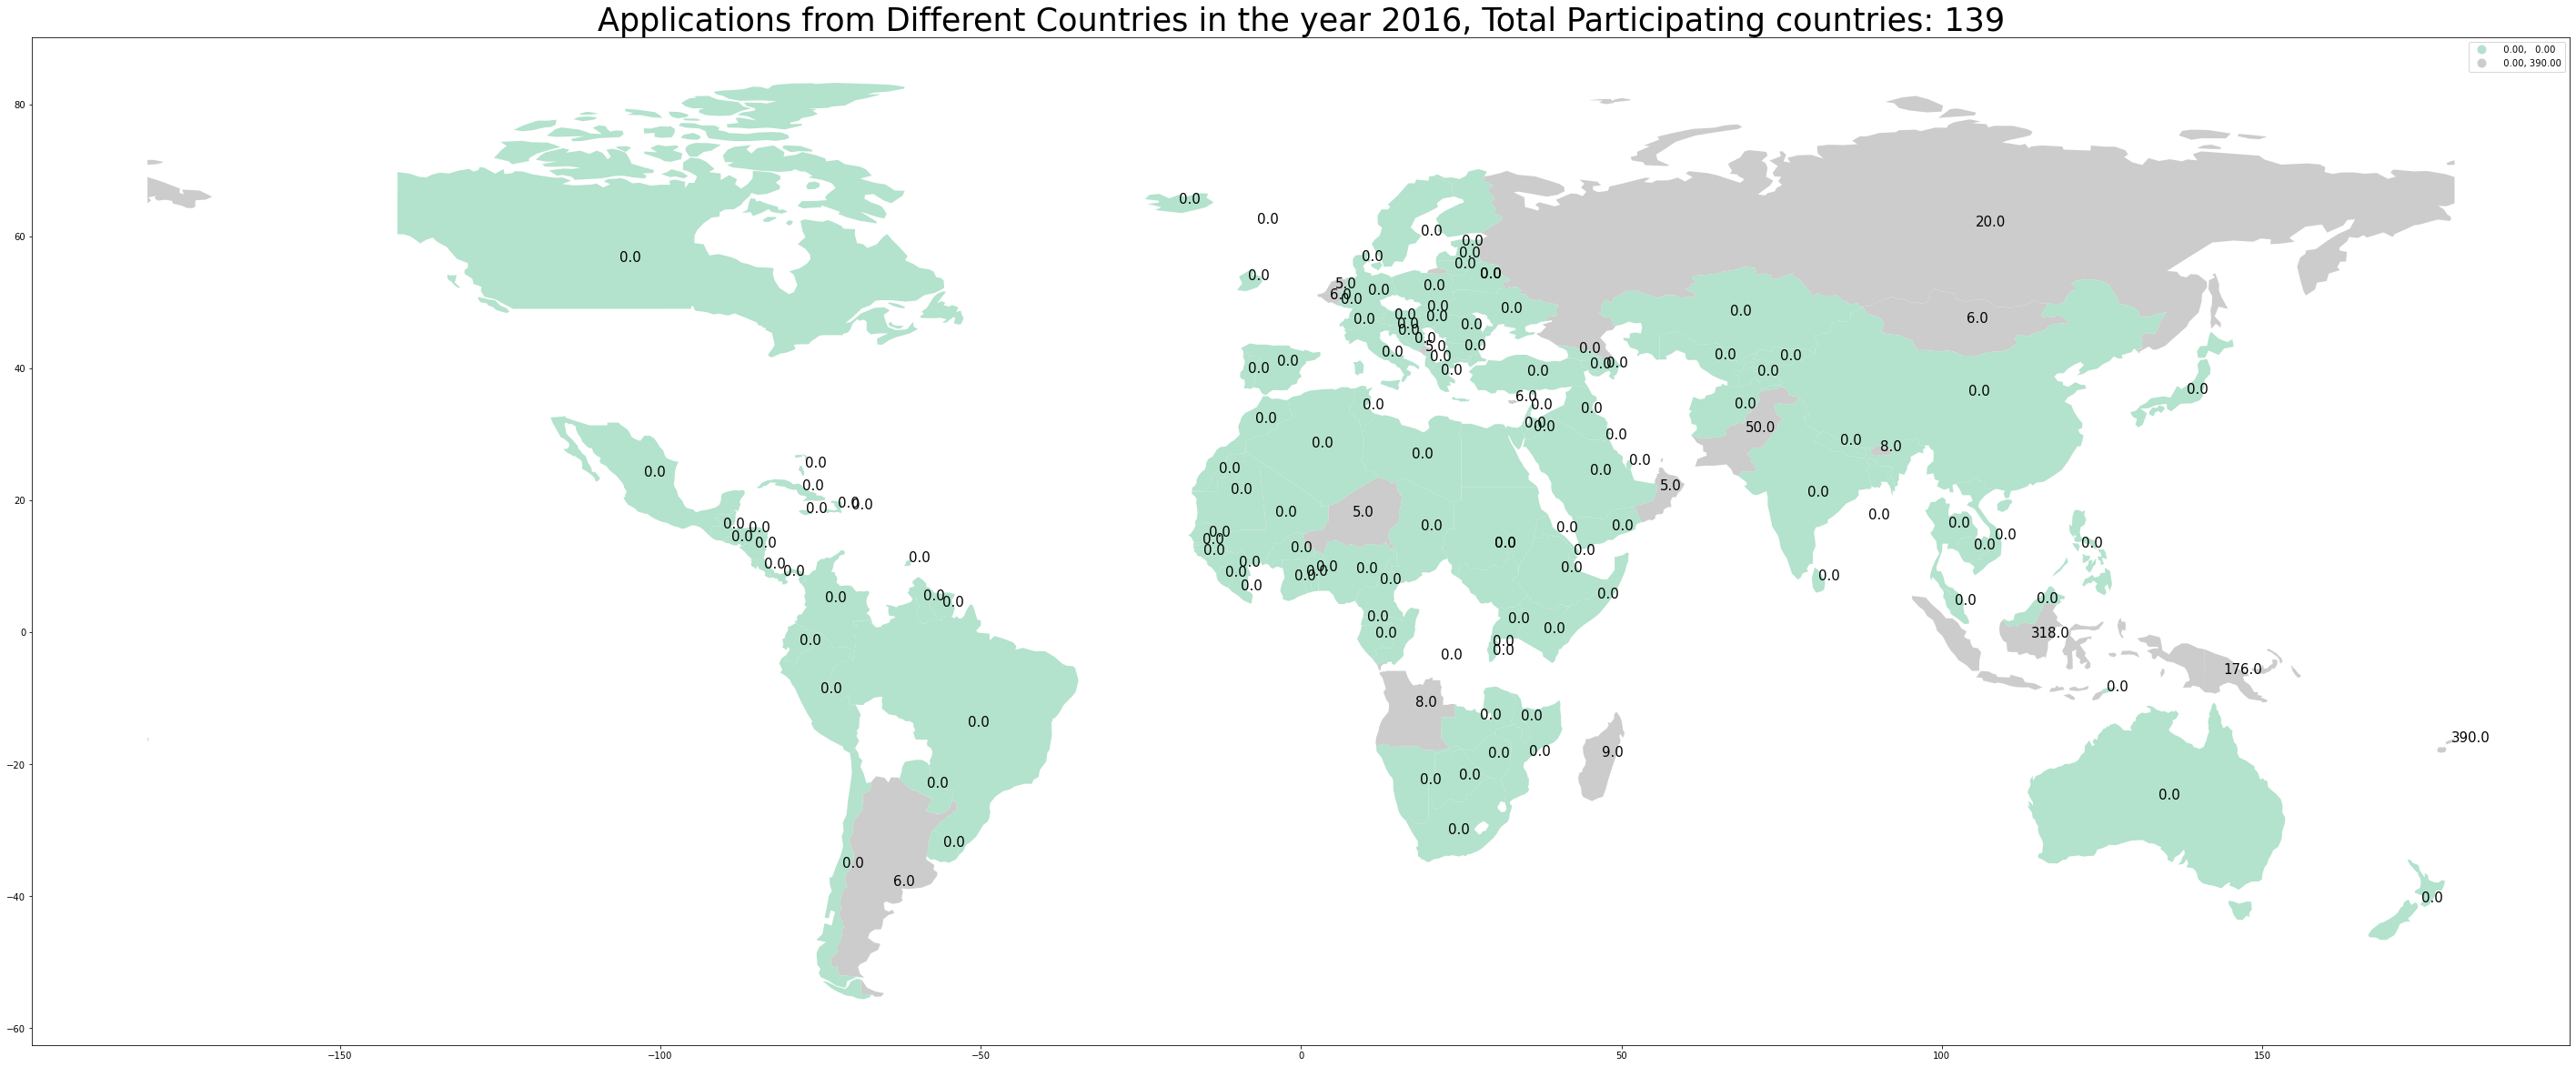

In [108]:
#plotting for the year 2016
plot_applications(2016,color='Pastel2')

In [ ]:
df[['country_of_residence','total_rejected']].plot(kind='bar')

In [112]:
df

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,AFG
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,AFG
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,AFG
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,AFG
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,USA,Zimbabwe,229.0,16.0,0.0,10.0,232.0,435.0,G,IN,N,ZWE
129716,2016,USA,Zimbabwe,12.0,0.0,0.0,23.0,142.0,138.0,G,EO,N,ZWE
129717,2016,South Africa,Zimbabwe,0.0,0.0,0.0,94.0,103.0,0.0,G,AR,N,ZWE
129718,2016,South Africa,Zimbabwe,7964.0,73.0,7869.0,0.0,45362.0,41260.0,G,FI,Y,ZWE


In [116]:
df.columns

Index(['year', 'country_of_residence', 'country_of_origin',
       'total_applied_during_year', 'decisions_recognized', 'total_rejected',
       'decisions_closed', 'total_pending_year_start',
       'total_pending_year_end', 'application_authority',
       'stage_of_application', 'Rejected(Y/N)', 'CODE'],
      dtype='object')

## Understanding the trend between applications and the rejections over the years 2000 through 2016.

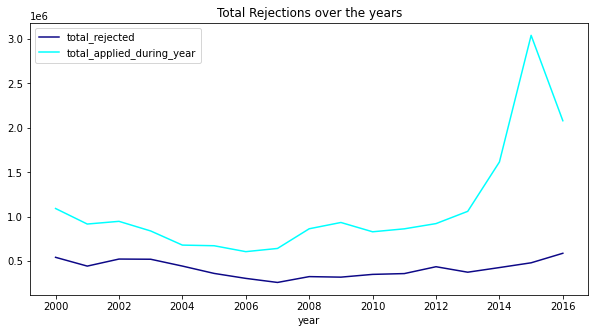

In [196]:
df.groupby('year').sum()['total_rejected'].plot(figsize=(10,5),title='Total Applications vs Rejections over the years',colormap='plasma',legend=True)
df.groupby('year').sum()['total_applied_during_year'].plot(figsize=(10,5),title='Total Rejections over the years',colormap='cool',legend=True)
plt.savefig("rejection_trend.png")

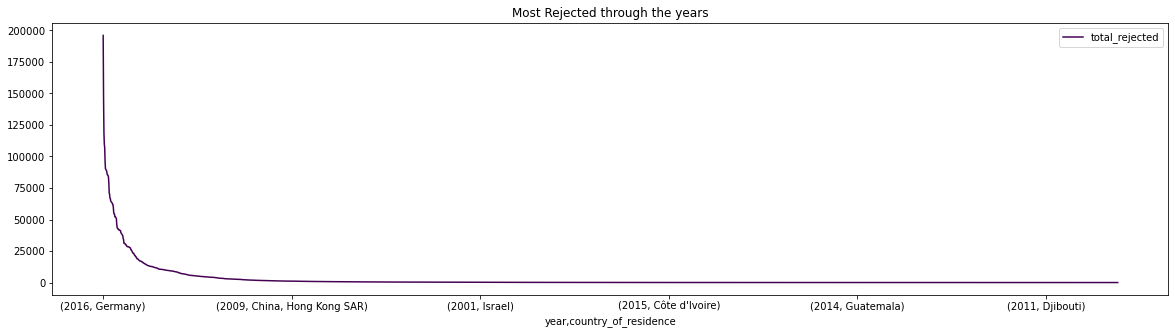

In [197]:
df.groupby(['year','country_of_residence']).sum().sort_values(by='total_rejected',ascending=False)['total_rejected'].plot(title='Most Rejected through the years',figsize=(20,5),legend=True,colormap='viridis')
plt.savefig("most_rejections.png")


<AxesSubplot:title={'center':'Most decisions_recognized through the years'}, xlabel='year,country_of_residence'>

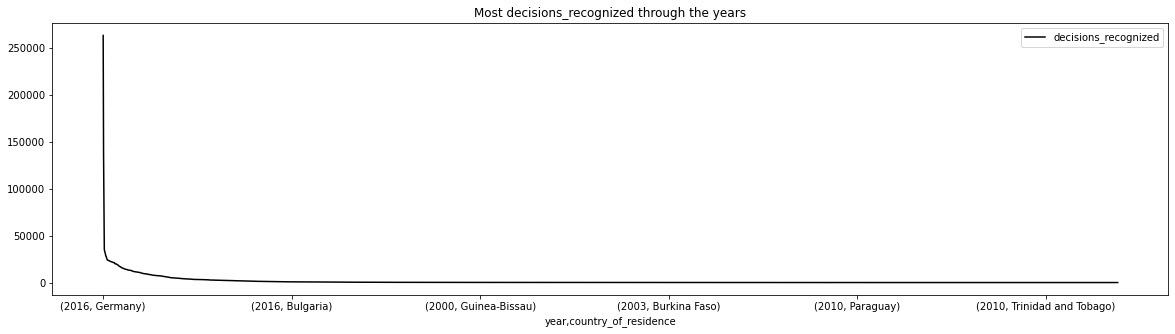

In [158]:
df.groupby(['year','country_of_residence']).sum().sort_values(by='decisions_recognized',ascending=False)['decisions_recognized'].plot(title='Most decisions_recognized through the years',figsize=(20,5),legend=True,colormap='magma')


In [159]:
df

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,AFG
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,AFG
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,AFG
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,AFG
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,USA,Zimbabwe,229.0,16.0,0.0,10.0,232.0,435.0,G,IN,N,ZWE
129716,2016,USA,Zimbabwe,12.0,0.0,0.0,23.0,142.0,138.0,G,EO,N,ZWE
129717,2016,South Africa,Zimbabwe,0.0,0.0,0.0,94.0,103.0,0.0,G,AR,N,ZWE
129718,2016,South Africa,Zimbabwe,7964.0,73.0,7869.0,0.0,45362.0,41260.0,G,FI,Y,ZWE


In [160]:
df

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,AFG
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,AFG
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,AFG
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,AFG
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,USA,Zimbabwe,229.0,16.0,0.0,10.0,232.0,435.0,G,IN,N,ZWE
129716,2016,USA,Zimbabwe,12.0,0.0,0.0,23.0,142.0,138.0,G,EO,N,ZWE
129717,2016,South Africa,Zimbabwe,0.0,0.0,0.0,94.0,103.0,0.0,G,AR,N,ZWE
129718,2016,South Africa,Zimbabwe,7964.0,73.0,7869.0,0.0,45362.0,41260.0,G,FI,Y,ZWE


In [ ]:
df1 = df.groupby(['year','country_of_origin'] as_index=False).agg({'Age': 'mean','number':'sum'})

In [161]:
df.groupby('year').size()

year
2000     5153
2001     5542
2002     5862
2003     6359
2004     6601
2005     6721
2006     6656
2007     6924
2008     7042
2009     7159
2010     7905
2011     8299
2012     8644
2013     9259
2014     9908
2015    11225
2016    10461
dtype: int64

In [163]:
df.columns

Index(['year', 'country_of_residence', 'country_of_origin',
       'total_applied_during_year', 'decisions_recognized', 'total_rejected',
       'decisions_closed', 'total_pending_year_start',
       'total_pending_year_end', 'application_authority',
       'stage_of_application', 'Rejected(Y/N)', 'CODE'],
      dtype='object')

In [170]:
df

,year,country_of_residence,country_of_origin,total_applied_during_year,decisions_recognized,total_rejected,decisions_closed,total_pending_year_start,total_pending_year_end,application_authority,stage_of_application,Rejected(Y/N),CODE
0,2000,Zimbabwe,Afghanistan,5.0,5.0,0.0,0.0,0.0,0.0,G,FI,N,AFG
1,2000,South Africa,Afghanistan,0.0,0.0,0.0,0.0,9.0,8.0,G,FI,N,AFG
2,2000,Uzbekistan,Afghanistan,2156.0,747.0,112.0,327.0,530.0,2470.0,U,FI,Y,AFG
3,2000,USA,Afghanistan,225.0,151.0,31.0,68.0,196.0,171.0,G,EO,Y,AFG
4,2000,USA,Afghanistan,218.0,182.0,51.0,40.0,193.0,150.0,G,IN,Y,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,USA,Zimbabwe,229.0,16.0,0.0,10.0,232.0,435.0,G,IN,N,ZWE
129716,2016,USA,Zimbabwe,12.0,0.0,0.0,23.0,142.0,138.0,G,EO,N,ZWE
129717,2016,South Africa,Zimbabwe,0.0,0.0,0.0,94.0,103.0,0.0,G,AR,N,ZWE
129718,2016,South Africa,Zimbabwe,7964.0,73.0,7869.0,0.0,45362.0,41260.0,G,FI,Y,ZWE


In [176]:
#applying one hot encoding to all the labels

year_code = pd.get_dummies(df.year)
country_of_resi = pd.get_dummies(df.country_of_residence)
country_of_orig = pd.get_dummies(df.country_of_origin)
application_author =  pd.get_dummies(df.application_authority)
stage_app = pd.get_dummies(df.stage_of_application)


In [172]:
df.columns

Index(['year', 'country_of_residence', 'country_of_origin',
       'total_applied_during_year', 'decisions_recognized', 'total_rejected',
       'decisions_closed', 'total_pending_year_start',
       'total_pending_year_end', 'application_authority',
       'stage_of_application', 'Rejected(Y/N)', 'CODE'],
      dtype='object')

In [181]:
new_df = df[['total_applied_during_year', 'decisions_recognized',
       'decisions_closed', 'total_pending_year_start',
       'total_pending_year_end']]
new_df = pd.DataFrame(StandardScaler().fit_transform(new_df),columns=new_df.columns)
new_df = pd.concat([new_df,year_code,country_of_resi,country_of_orig,application_author,stage_app],axis=1)
new_df

,total_applied_during_year,decisions_recognized,decisions_closed,total_pending_year_start,total_pending_year_end,2000,2001,2002,2003,2004,...,EO,FA,FI,IN,JR,RA,SP,TA,TP,TR
0,-0.065207,-0.034817,-0.030068,-0.057136,-0.064749,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.067560,-0.042260,-0.030068,-0.054124,-0.061987,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.946970,1.069681,0.210462,0.120265,0.787978,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.038316,0.182510,0.019951,0.008469,-0.005714,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.035022,0.228655,-0.000645,0.007465,-0.012964,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,0.040198,-0.018443,-0.022712,0.020519,0.085427,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
129716,-0.061914,-0.042260,-0.013150,-0.009606,-0.017107,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
129717,-0.067560,-0.042260,0.039075,-0.022660,-0.064749,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129718,3.679990,0.066404,-0.030068,15.126429,14.179589,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [183]:
#applying regression algorithms to predict total rejection 

y = df.total_rejected
y

0            0.0
1            0.0
2          112.0
3           31.0
4           51.0
           ...  
129715       0.0
129716       0.0
129717       0.0
129718    7869.0
129719       0.0
Name: total_rejected, Length: 129720, dtype: float64

In [185]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.30, random_state=42)

In [189]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import *

In [188]:

    
clf = Ridge(alpha=1.0)
clf = clf.fit(X_train, y_train)

mean_squared_error(y_train,clf.predict(X_train),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


591.3825640302342

In [212]:
clf.score(X_test,y_test)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.23490688813541483

In [191]:
#testing on test set
mean_squared_error(y_test,clf.predict(X_test),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


396.5845464061309

In [192]:
lasso_clf = Lasso()
lasso_clf = lasso_clf.fit(X_train, y_train)

mean_squared_error(y_train,lasso_clf.predict(X_train),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


595.3230053261866

In [211]:
lasso_clf.score(X_test,y_test)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.23002064200141203

In [193]:
#testing on test set
mean_squared_error(y_test,lasso_clf.predict(X_test),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


397.8489190524128

In [194]:
#trying out Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train,y_train)

mean_squared_error(y_train,rf_model.predict(X_train),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


272.61892095247447

In [195]:
mean_squared_error(y_test,rf_model.predict(X_test),squared=False)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


305.0526373927296

In [214]:
rf_model.score(X_test,y_test)

/Users/anushaprakash/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.547318979854074